In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('fifa_players (1).csv')
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [50]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['overall_rating'])


age                              0.461529
height_cm                        0.038080
weight_kgs                       0.150521
overall_rating                   1.000000
potential                        0.647249
value_euro                       0.630928
wage_euro                        0.577316
international_reputation(1-5)    0.489416
weak_foot(1-5)                   0.216394
skill_moves(1-5)                 0.418718
release_clause_euro              0.614804
national_rating                  0.733395
national_jersey_number          -0.104753
crossing                         0.398343
finishing                        0.342331
heading_accuracy                 0.347670
short_passing                    0.506819
volleys                          0.396922
dribbling                        0.378718
curve                            0.423890
freekick_accuracy                0.400878
long_passing                     0.489998
ball_control                     0.464336
acceleration                     0

In [51]:
df.drop(['potential','value_euro','wage_euro','release_clause_euro','national_rating', 'reactions','composure','name', 'full_name', 'birth_date', 'national_team', 'national_team_position',
         'national_jersey_number'], axis=1, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  object 
 4   nationality                    17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   preferred_foot                 17954 non-null  object 
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  object 
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null 

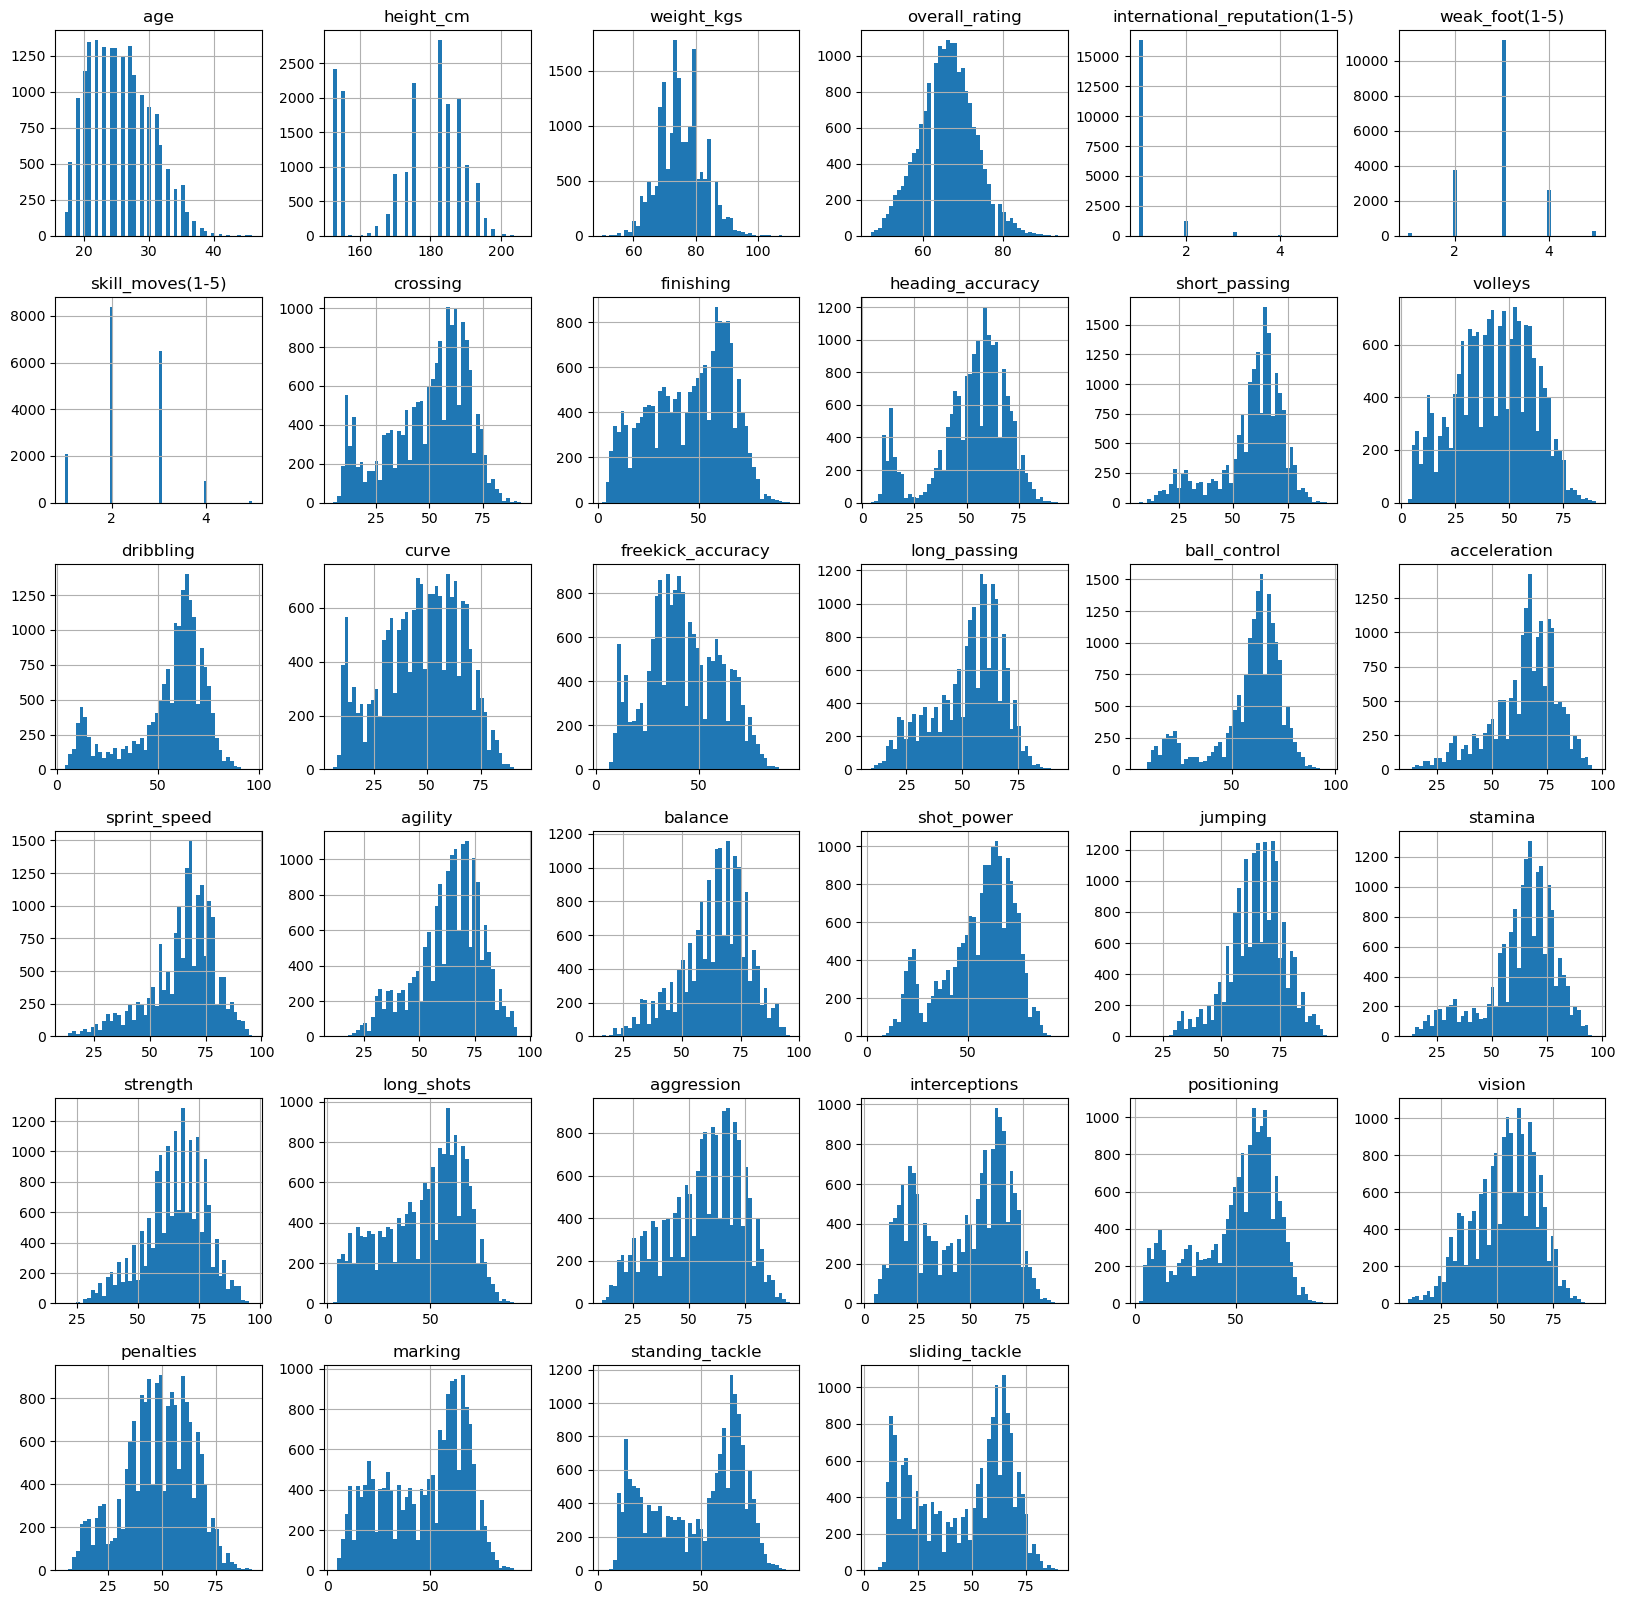

In [54]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['preferred_foot'] = le.fit_transform(df['preferred_foot'])

In [36]:
from sklearn.preprocessing import OneHotEncoder

top_20_nationalities = df['nationality'].value_counts().nlargest(20).index
df['nationality_top_20'] = df['nationality'].apply(lambda x: x if x in top_20_nationalities else 'Other')


one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
nationality_encoded = one_hot_encoder.fit_transform(df[['nationality_top_20']])

nationality_encoded_df = pd.DataFrame(nationality_encoded, columns=one_hot_encoder.get_feature_names_out(['nationality_top_20']))
df = pd.concat([df, nationality_encoded_df], axis=1)

df.drop(['nationality', 'nationality_top_20'], axis=1, inplace=True)
df.head()


,age,height_cm,weight_kgs,positions,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,nationality_top_20_Mexico,nationality_top_20_Netherlands,nationality_top_20_Norway,nationality_top_20_Other,nationality_top_20_Poland,nationality_top_20_Portugal,nationality_top_20_Republic of Ireland,nationality_top_20_Spain,nationality_top_20_Sweden,nationality_top_20_United States
0,31,170.18,72.1,"CF,RW,ST",94,0,5,4,4,Messi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27,154.94,76.2,"CAM,RM,CM",88,1,3,5,4,Lean,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,190.50,83.9,"CM,CAM",88,1,4,4,5,Normal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,162.56,59.0,"LW,ST",88,1,3,4,4,Normal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,187.96,88.9,CB,88,1,3,3,2,Normal,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
one_hot_encoder_body_type = OneHotEncoder(sparse_output=False, drop='first')
body_type_encoded = one_hot_encoder_body_type.fit_transform(df[['body_type']])

body_type_encoded_df = pd.DataFrame(body_type_encoded, columns=one_hot_encoder_body_type.get_feature_names_out(['body_type']))
df = pd.concat([df, body_type_encoded_df], axis=1)

df.drop(['body_type'], axis=1, inplace=True)

df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,sliding_tackle,body_type_C. Ronaldo,body_type_Courtois,body_type_Lean,body_type_Messi,body_type_Neymar,body_type_Normal,body_type_PLAYER_BODY_TYPE_25,body_type_Shaqiri,body_type_Stocky
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,0,5,4,4,...,26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,1,3,5,4,...,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,190.50,83.9,"CM,CAM",France,88,1,4,4,5,...,67,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27,162.56,59.0,"LW,ST",Italy,88,1,3,4,4,...,22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,27,187.96,88.9,CB,Senegal,88,1,3,3,2,...,87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
df['positions_split'] = df['positions'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()

positions_encoded = mlb.fit_transform(df['positions_split'])
positions_encoded_df = pd.DataFrame(positions_encoded, columns=mlb.classes_, index=df.index)
df = pd.concat([df, positions_encoded_df], axis=1)

df.drop(['positions', 'positions_split'], axis=1, inplace=True)

df.head()

,age,height_cm,weight_kgs,nationality,overall_rating,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),crossing,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,170.18,72.1,Argentina,94,0,5,4,4,86,...,0,0,0,0,0,0,0,1,0,1
1,27,154.94,76.2,Denmark,88,1,3,5,4,88,...,0,0,0,0,0,0,1,0,0,0
2,25,190.50,83.9,France,88,1,4,4,5,80,...,0,0,0,0,0,0,0,0,0,0
3,27,162.56,59.0,Italy,88,1,3,4,4,86,...,0,0,0,1,0,0,0,0,0,1
4,27,187.96,88.9,Senegal,88,1,3,3,2,30,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.drop('nationality', axis=1, inplace=True)

In [60]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['height_cm'], axis=1)
y = df['height_cm']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                          feature    importance
20                        balance  3.382858e-01
1                      weight_kgs  9.838258e-02
24                       strength  3.331424e-02
9                heading_accuracy  2.586413e-02
22                        jumping  2.563755e-02
19                        agility  2.220022e-02
23                        stamina  2.218266e-02
26                     aggression  2.216105e-02
0                             age  2.208448e-02
17                   acceleration  1.964923e-02
7                        crossing  1.961081e-02
14              freekick_accuracy  1.923050e-02
30                      penalties  1.871260e-02
18                   sprint_speed  1.867607e-02
21                     shot_power  1.740731e-02
28                    positioning  1.711553e-02
31                        marking  1.707313e-02
11                        volleys  1.703950e-02
13                          curve  1.644914e-02
15                   long_passing  1.627

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


valid_height = df[df['height_cm'] >= 160]
X = valid_height[['balance','weight_kgs']]
y = valid_height['height_cm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mse_rf ** 0.5

print("Random Forest Evaluation:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

Random Forest Evaluation:
MAE: 2.88
MSE: 14.77
RMSE: 3.84


In [64]:
invalid_height = df[df['height_cm'] < 160]
X = invalid_height[['balance','weight_kgs']]

y_pred_short = rf_model.predict(X)

df.loc[df['height_cm'] < 160, 'height_cm'] = y_pred_short

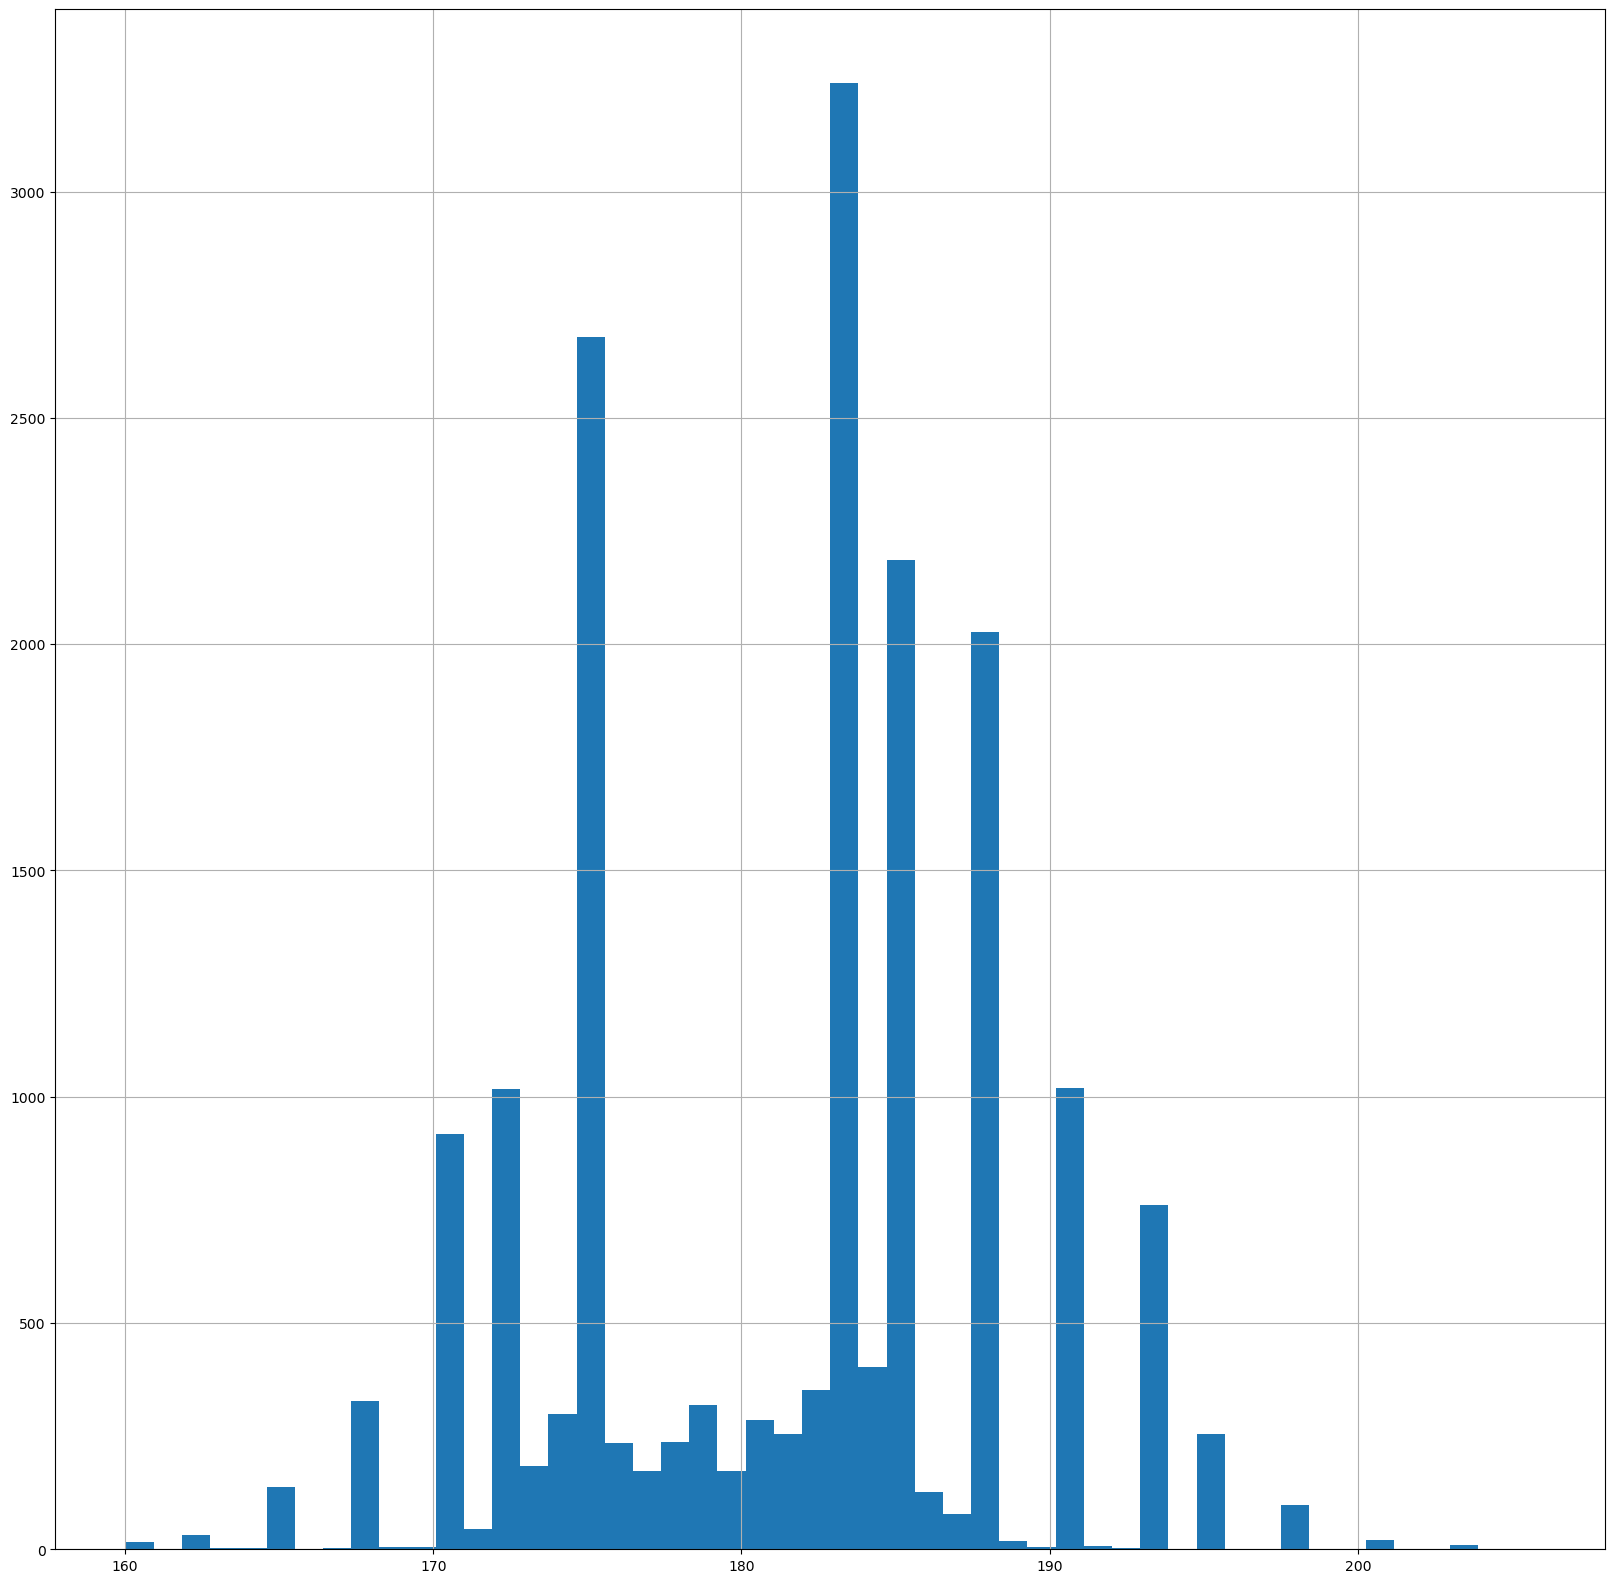

In [65]:
df['height_cm'].hist(bins=50, figsize=(20,20))
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   overall_rating                 17954 non-null  int64  
 4   preferred_foot                 17954 non-null  int32  
 5   international_reputation(1-5)  17954 non-null  int64  
 6   weak_foot(1-5)                 17954 non-null  int64  
 7   skill_moves(1-5)               17954 non-null  int64  
 8   crossing                       17954 non-null  int64  
 9   finishing                      17954 non-null  int64  
 10  heading_accuracy               17954 non-null  int64  
 11  short_passing                  17954 non-null  int64  
 12  volleys                        17954 non-null 

In [67]:
X = df.drop(['overall_rating'],axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X_train.shape

(12567, 58)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR

In [75]:
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.95), SVR())

param_grid = {
    'svr__C': [0.1,1,10],      
    'svr__gamma': ['scale', 'auto'],   
    'svr__kernel': ['linear', 'rbf'], 
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'svr__C': 10, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best Score: 0.9155724399982033


In [76]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1.35
MSE: 4.52
RMSE: 2.13


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder

data = pd.read_csv('data.csv')

In [12]:
data.drop('nationality', axis=1, inplace=True)

In [31]:
data.drop('height_cm',axis=1,inplace=True)

In [21]:
X = data.drop(['overall_rating'],axis=1)
y = data['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline = make_pipeline(TargetEncoder(cols=['nationality']),
    StandardScaler(), PCA(n_components=0.95), SVR())

param_grid = {
    'svr__C': [0.1,1,10],
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['linear', 'rbf'],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'svr__C': 10, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best Score: 0.9148716127683849


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mse ** 0.5
r2 = r2_score(y_train,y_train_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(r2)

MAE: 0.97
MSE: 3.05
RMSE: 1.75
0.9369506573113173


In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(r2)

MAE: 1.27
MSE: 3.71
RMSE: 1.93
0.922835964815556


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(best_model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(best_model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.92623555 0.9216575  0.92294557 0.91515993 0.91687078]
R^2 trung bình: 0.921 ± 0.004

MSE: [3.58684354 3.76769318 3.73022468 4.00708725 4.08162271]
MSE trung bình: 3.835± 0.183

MAE: [1.24979535 1.2464358  1.25455586 1.29703465 1.27162298]
MAE trung bình: 1.264 ± 0.019


In [34]:
from sklearn.linear_model import LinearRegression
X = data.drop(['overall_rating'],axis=1)
y = data['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline = make_pipeline(TargetEncoder(cols=['nationality']),
                         StandardScaler(), 
                         # PCA(n_components=0.95), 
                         LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('targetencoder', TargetEncoder(cols=['nationality'])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [35]:
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(r2)

MAE: 2.26
MSE: 9.06
RMSE: 3.01
0.8117944514289553
